In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
########## Balance mix strategy

In [61]:
### FE Low-cap Scenario

In [62]:
l_FE_variables = pd.read_csv(r'../../results/lowcap-FE-optimized-variables.csv', low_memory=False)

In [63]:
l_FE_coefficients = pd.read_csv(r'../../results/lowcap-FE-coefficients.csv', low_memory=False)

In [64]:
busiest_day= pd.read_csv(r'../../results/busiest-day-trips-info.csv', low_memory=False)

In [65]:
data = {'Variable': ['x_CDB[low-cap,0,528277]'], 'Value': [1]}
l_FE_variables = pd.DataFrame(l_FE_variables)

# Extract attributes
l_FE_variables[['Powertrain', 'Scenario', 'Year', 'Trip']] = l_FE_variables['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')

# Drop rows with nan values
l_FE_variables = l_FE_variables.dropna()

# Convert Year to numeric
l_FE_variables['Year'] = l_FE_variables['Year'].astype(int)

# Merge with coeeficients
l_FE_variables['Coefficient'] = l_FE_coefficients['Coefficient']

In [66]:
l_FE_variables['Trip'] = l_FE_variables['Trip'].astype(str)
busiest_day['TripKey'] = busiest_day['TripKey'].astype(str)

# Merge the dataframes on matching values
merged_df = l_FE_variables.merge(busiest_day[['TripKey', 'Route', 'Stop_first', 'Stop_last', 'ServiceDateTime_min', 'ServiceDateTime_max', 'dist']], 
                                 left_on='Trip', 
                                 right_on='TripKey', 
                                 how='left')

# Drop the TripKey column if not needed
merged_df.drop(columns='TripKey', inplace=True)

# Update h_FE_variables
l_FE_variables = merged_df

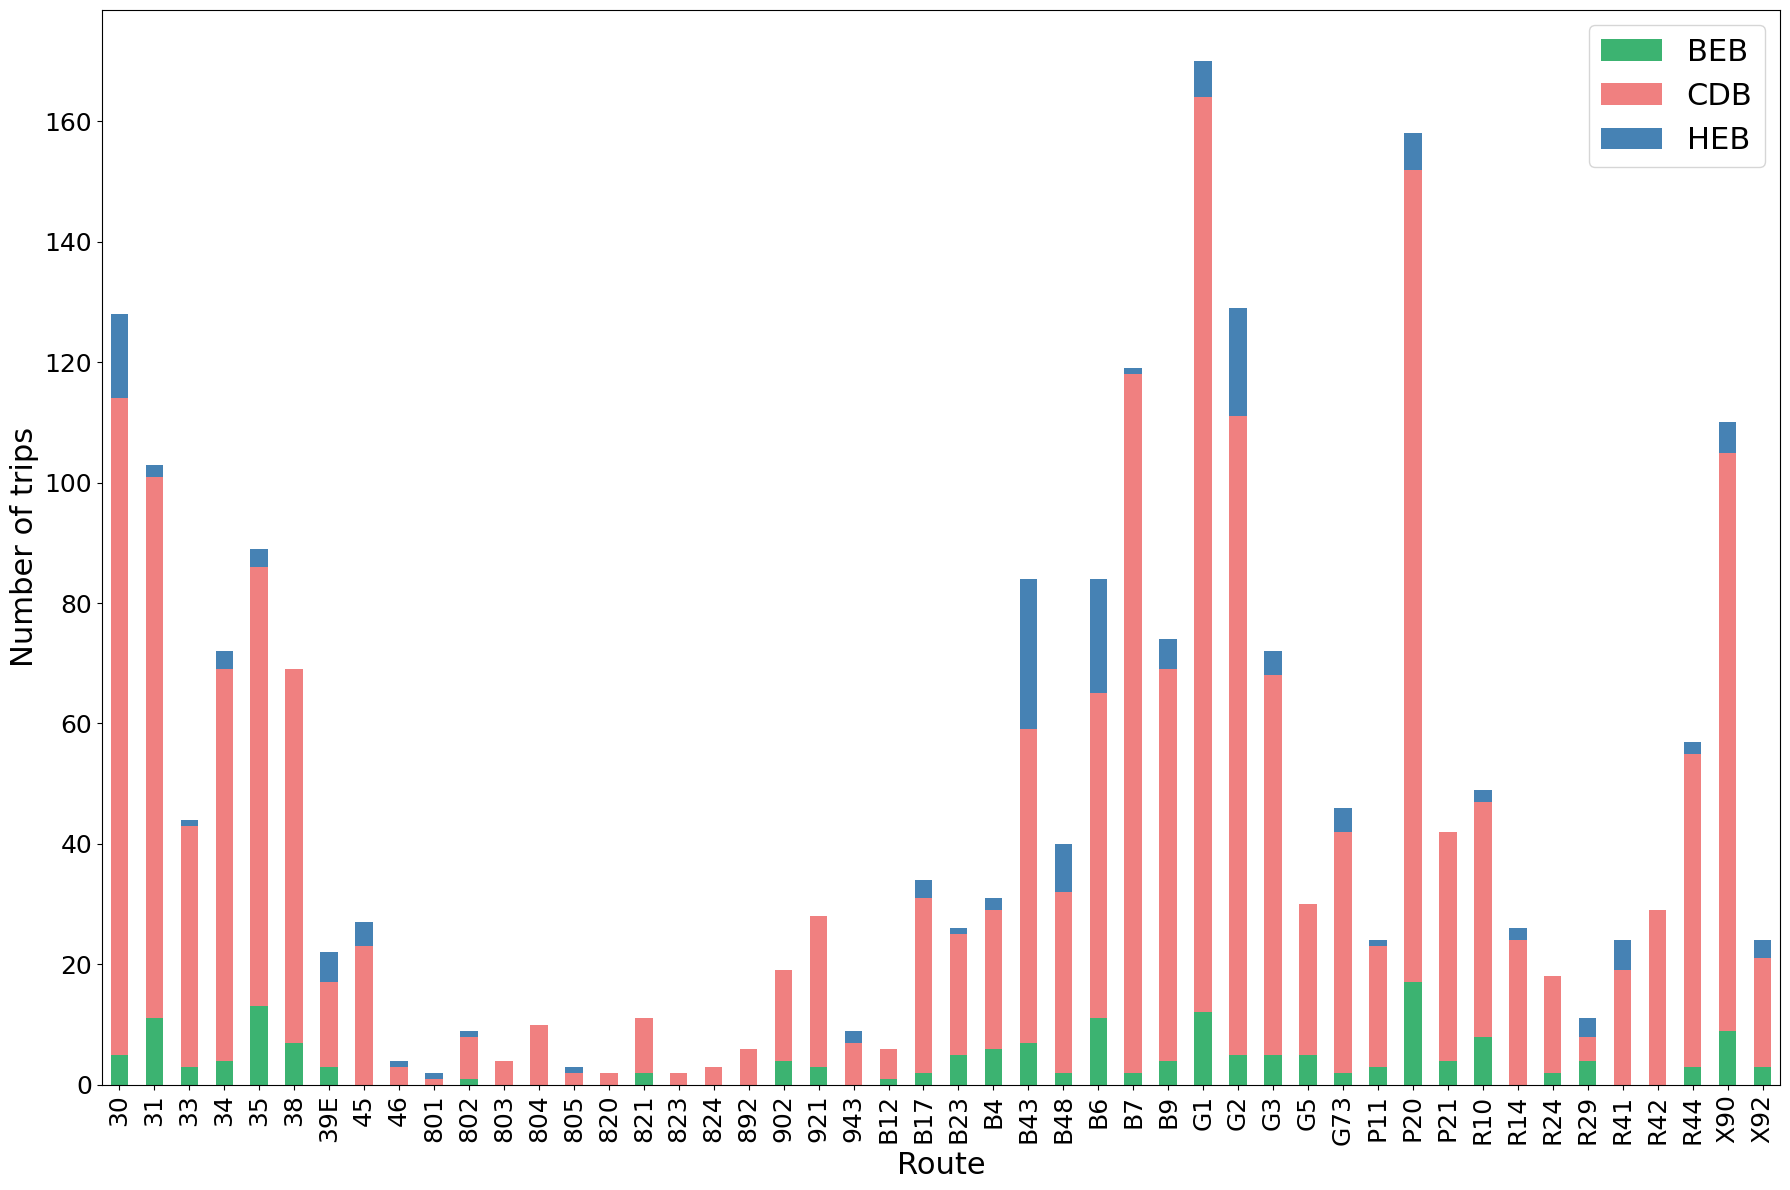

In [67]:
# Filter the dataframe for Year=13 and Value=1
l_FE_variables_filtered = l_FE_variables[(l_FE_variables['Year'] == 13) & (l_FE_variables['Value'] == 1)]
l_FE_variables_filtered = l_FE_variables_filtered[l_FE_variables_filtered['Route'] != '9999']

# Group by Route and Powertrain to count unique trips
grouped_trips = l_FE_variables_filtered.groupby(['Route', 'Powertrain'])['Trip'].nunique().unstack(fill_value=0)

# Plot
# Create a figure and a set of subplots with larger size
fig, ax = plt.subplots(figsize=(18, 12))

colors = {'CDB': 'lightcoral', 'HEB': 'steelblue', 'BEB': 'mediumseagreen'}
ax = grouped_trips.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_trips.columns], ax=ax)

# Annotate with BEB percentages
for index, (route, row) in enumerate(grouped_trips.iterrows()):
    total = row.sum()
    BEB_count = row.get('BEB', 0)
    percentage = (BEB_count / total) * 100
    #ax.text(index, row['CDB'] + row['HEB'] + (0.5 * BEB_count), f'{percentage:.1f}%', ha='center', color='white', fontsize=10)
    
# Set the title and labels with larger font sizes
ax.set_xlabel('Route', fontsize=22)
ax.set_ylabel('Number of trips', fontsize=22)
ax.legend(fontsize=22)

# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()


In [68]:
l_FE_variables.to_csv(r'../../results/lowcap-FE-coefficients-integerated.csv', index=False)

In [69]:
# Compute the total BEB counts and total trips
total_BEB_counts = grouped_trips['BEB'].sum()
total_trips = grouped_trips.sum(axis=1).sum()

# Calculate average %BEB across all routes
average_percentage_BEB = (total_BEB_counts / total_trips) * 100

print(f"Average %BEB across all routes: {average_percentage_BEB:.2f}%")


Average %BEB across all routes: 8.15%


In [70]:
l_FE_variables_y = pd.read_csv(r'../../results/lowcap-FE-optimized-variables-y.csv', low_memory=False)

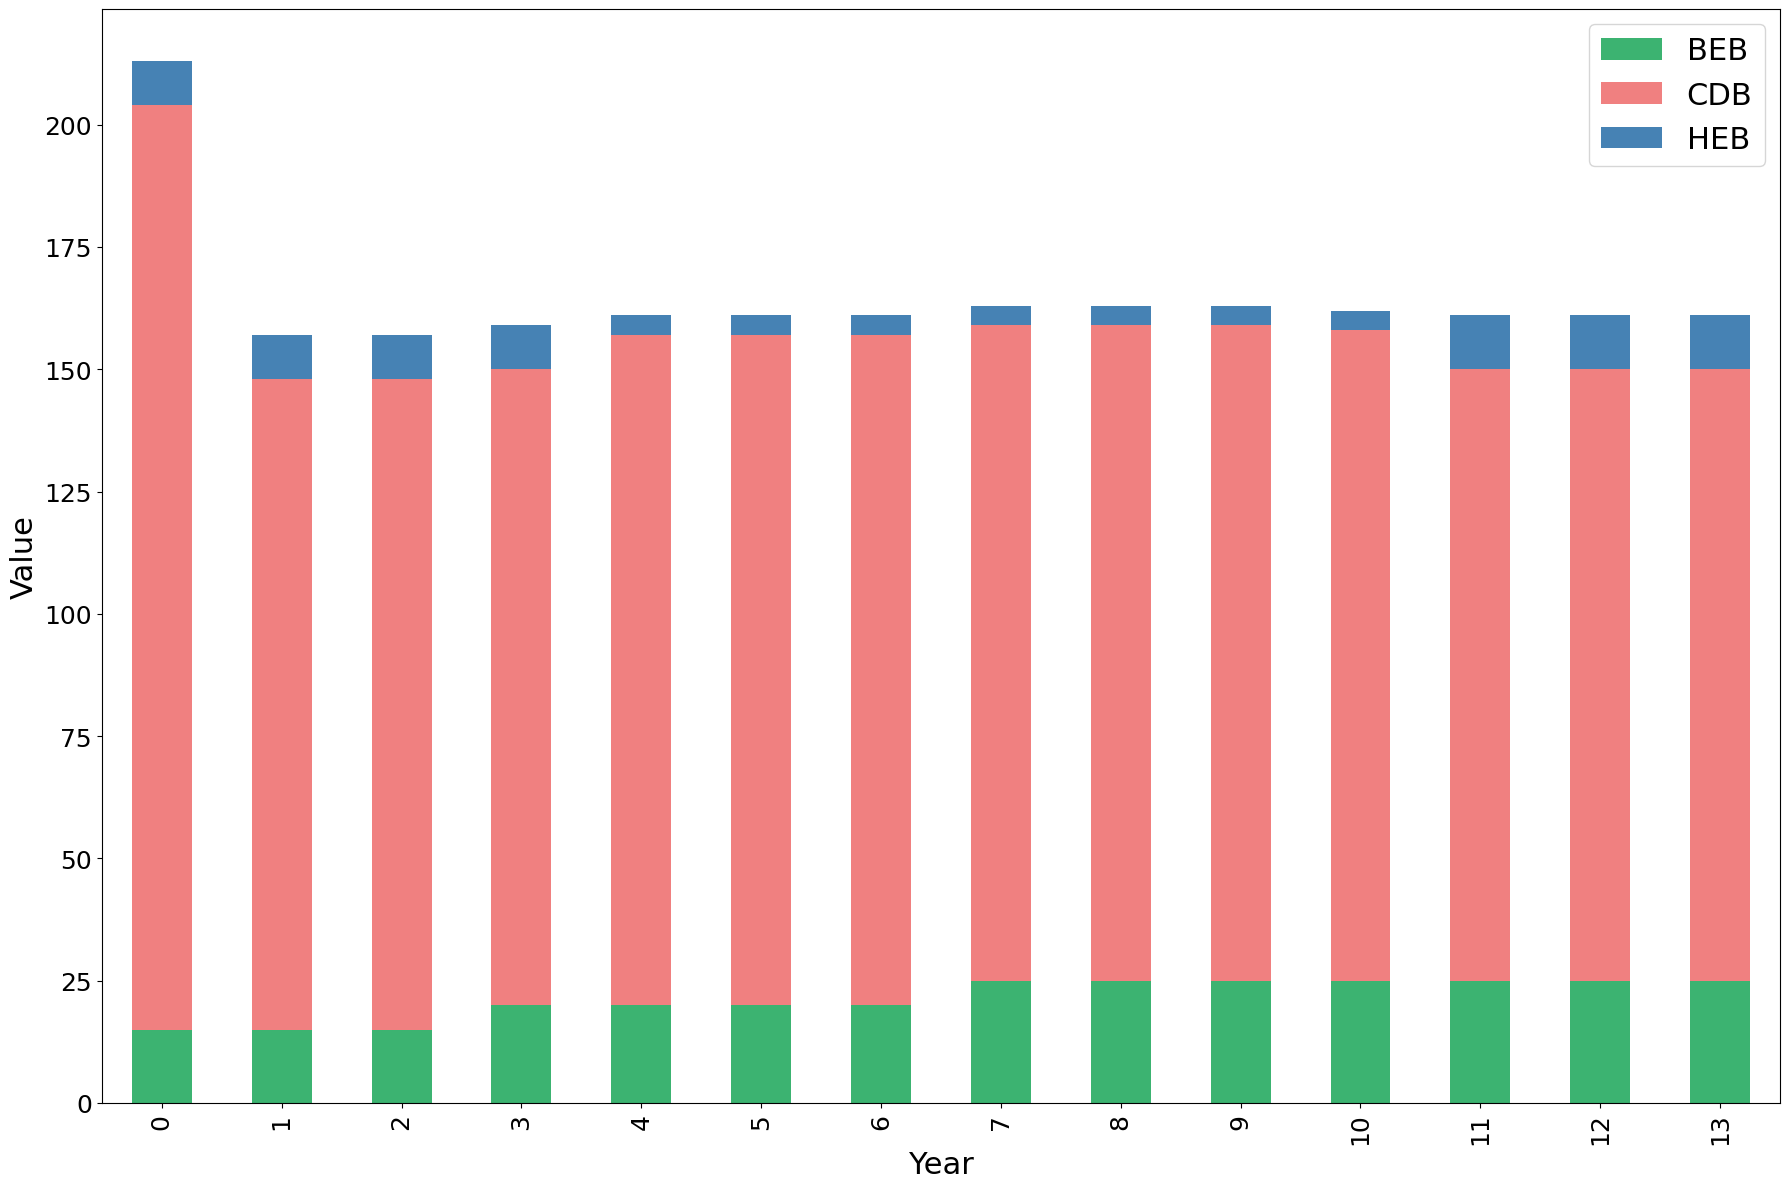

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Powertrain to sum up the Value
grouped_values = l_FE_variables_y.groupby(['Year', 'Powertrain'])['Value'].sum().unstack(fill_value=0)

# Plot
# Create a figure and a set of subplots with a larger size
fig, ax = plt.subplots(figsize=(18, 12))

colors = {'CDB': 'lightcoral', 'HEB': 'steelblue', 'BEB': 'mediumseagreen'}
ax = grouped_values.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_values.columns], ax=ax)

# Annotate with BEB percentages
for index, (year, row) in enumerate(grouped_values.iterrows()):
    total = row.sum()
    BEB_count = row.get('BEB', 0)
    percentage = (BEB_count / total) * 100
    # Uncomment the next line if you want the BEB percentages to be displayed on the bars
    # ax.text(index, row['CDB'] + row['HEB'] + (0.5 * BEB_count), f'{percentage:.1f}%', ha='center', color='white', fontsize=10)
    
# Set the title and labels with larger font sizes
ax.set_xlabel('Year', fontsize=22)
ax.set_ylabel('Value', fontsize=22)
ax.legend(fontsize=22)
ax.set_xticklabels(grouped_values.index, rotation=0)


# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()


In [4]:
### FE High-cap Scenario

In [5]:
h_FE_variables = pd.read_csv(r'../../results/highcap-FE-optimized-variables.csv', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '../../results/highcap-FE-optimized-variables.csv'

In [130]:
h_FE_coefficients = pd.read_csv(r'../../results/highcap-FE-coefficients.csv', low_memory=False)

In [131]:
data = {'Variable': ['x_CDB[high-cap,0,528277]'], 'Value': [1]}
h_FE_variables = pd.DataFrame(h_FE_variables)

# Extract attributes
h_FE_variables[['Powertrain', 'Scenario', 'Year', 'Trip']] = h_FE_variables['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')

# Drop rows with nan values
h_FE_variables = h_FE_variables.dropna()

# Convert Year to numeric
h_FE_variables['Year'] = h_FE_variables['Year'].astype(int)

# Merge with coeeficients
h_FE_variables['Coefficient'] = h_FE_coefficients['Coefficient']

KeyError: 'Variable'

In [127]:
h_FE_variables['Trip'] = h_FE_variables['Trip'].astype(str)
busiest_day['TripKey'] = busiest_day['TripKey'].astype(str)

# Merge the dataframes on matching values
merged_df = h_FE_variables.merge(busiest_day[['TripKey', 'Route', 'Stop_first', 'Stop_last', 'ServiceDateTime_min', 'ServiceDateTime_max', 'dist']], 
                                 left_on='Trip', 
                                 right_on='TripKey', 
                                 how='left')

# Drop the TripKey column if not needed
merged_df.drop(columns='TripKey', inplace=True)

# Update h_FE_variables
h_FE_variables = merged_df

KeyError: 'Trip'

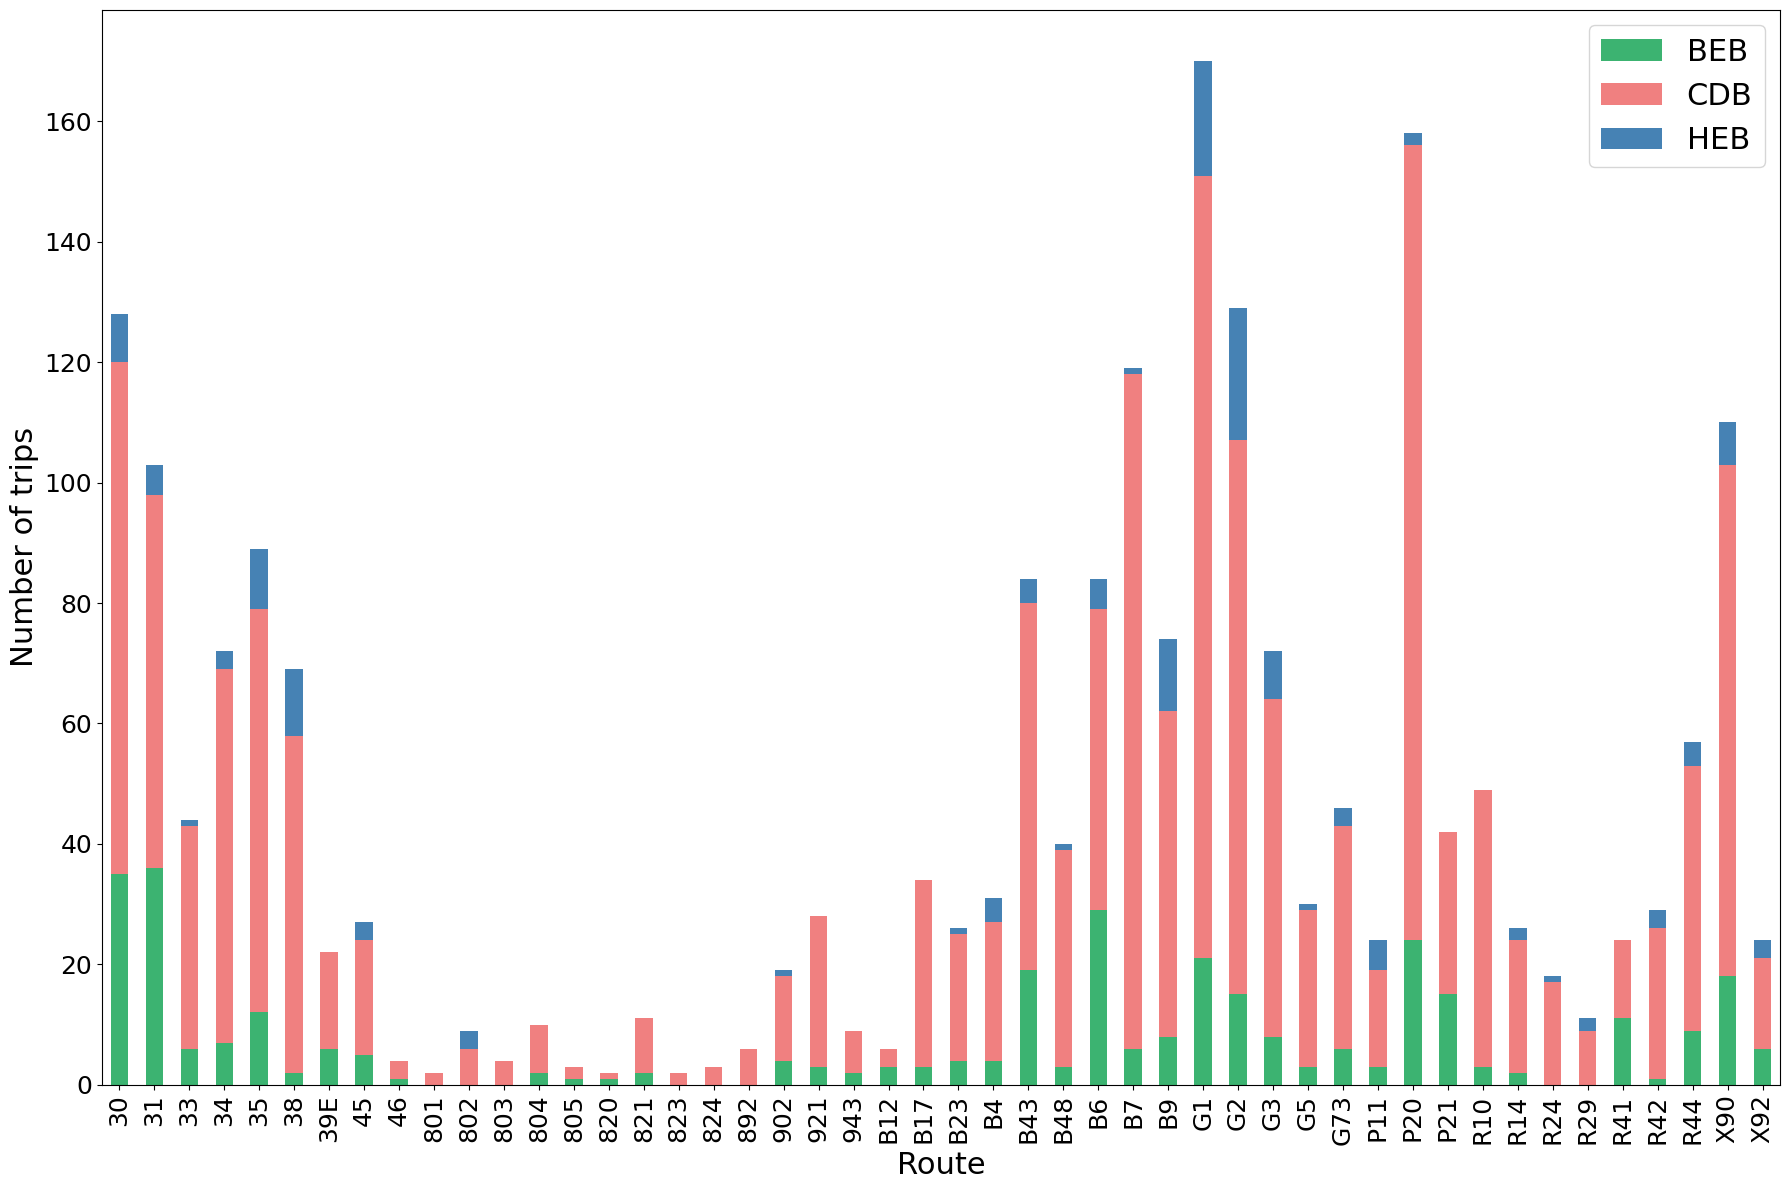

In [118]:
# Filter the dataframe for Year=13 and Value=1
h_FE_variables_filtered = h_FE_variables[(h_FE_variables['Year'] == 13) & (h_FE_variables['Value'] == 1)]
h_FE_variables_filtered = h_FE_variables_filtered[h_FE_variables_filtered['Route'] != '9999']

# Group by Route and Powertrain to count unique trips
grouped_trips = h_FE_variables_filtered.groupby(['Route', 'Powertrain'])['Trip'].nunique().unstack(fill_value=0)

# Plot
# Create a figure and a set of subplots with larger size
fig, ax = plt.subplots(figsize=(18, 12))

colors = {'CDB': 'lightcoral', 'HEB': 'steelblue', 'BEB': 'mediumseagreen'}
ax = grouped_trips.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_trips.columns], ax=ax)

# Annotate with BEB percentages
for index, (route, row) in enumerate(grouped_trips.iterrows()):
    total = row.sum()
    BEB_count = row.get('BEB', 0)
    percentage = (BEB_count / total) * 100
    #ax.text(index, row['CDB'] + row['HEB'] + (0.5 * BEB_count), f'{percentage:.1f}%', ha='center', color='white', fontsize=10)
    
# Set the title and labels with larger font sizes
ax.set_xlabel('Route', fontsize=22)
ax.set_ylabel('Number of trips', fontsize=22)
ax.legend(fontsize=22)

# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()


In [119]:
h_FE_variables.to_csv(r'../../results/highcap-FE-coefficients-integerated.csv', index=False)

In [120]:
# Compute the total BEB counts and total trips
total_BEB_counts = grouped_trips['BEB'].sum()
total_trips = grouped_trips.sum(axis=1).sum()

# Calculate average %BEB across all routes
average_percentage_BEB = (total_BEB_counts / total_trips) * 100

print(f"Average %BEB across all routes: {average_percentage_BEB:.2f}%")


Average %BEB across all routes: 15.99%


In [121]:
h_FE_variables_y = pd.read_csv(r'../../results/highcap-FE-optimized-variables-y.csv', low_memory=False)

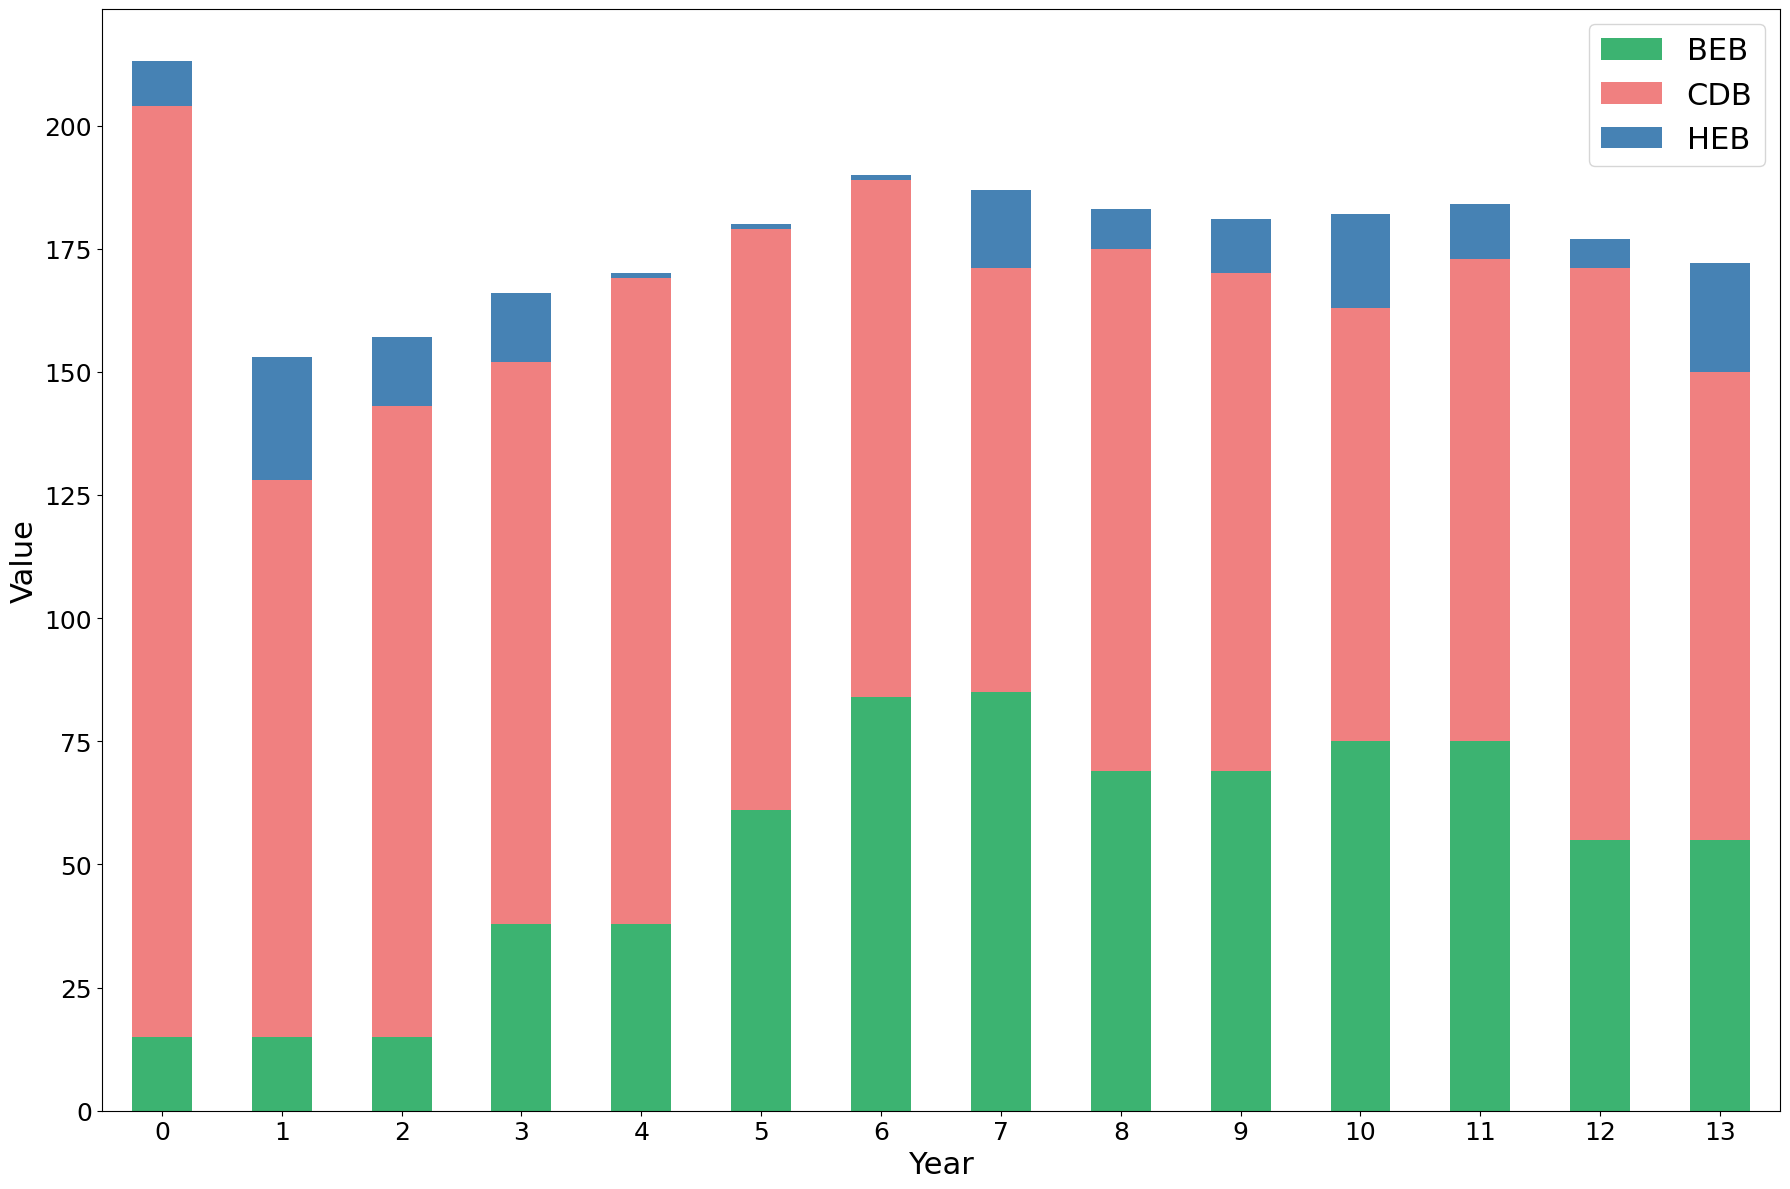

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Powertrain to sum up the Value
grouped_values = h_FE_variables_y.groupby(['Year', 'Powertrain'])['Value'].sum().unstack(fill_value=0)

# Plot
# Create a figure and a set of subplots with a larger size
fig, ax = plt.subplots(figsize=(18, 12))

colors = {'CDB': 'lightcoral', 'HEB': 'steelblue', 'BEB': 'mediumseagreen'}
ax = grouped_values.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_values.columns], ax=ax)

# Annotate with BEB percentages
for index, (year, row) in enumerate(grouped_values.iterrows()):
    total = row.sum()
    BEB_count = row.get('BEB', 0)
    percentage = (BEB_count / total) * 100
    # Uncomment the next line if you want the BEB percentages to be displayed on the bars
    # ax.text(index, row['CDB'] + row['HEB'] + (0.5 * BEB_count), f'{percentage:.1f}%', ha='center', color='white', fontsize=10)
    
# Set the title and labels with larger font sizes
ax.set_xlabel('Year', fontsize=22)
ax.set_ylabel('Value', fontsize=22)
ax.legend(fontsize=22)
ax.set_xticklabels(grouped_values.index, rotation=0)

# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()


In [82]:
### FE Mid-cap Scenario

In [83]:
m_FEFE_variables = pd.read_csv(r'../../results/midcap-FE-optimized-variables.csv', low_memory=False)

In [84]:
m_FEFE_coefficients = pd.read_csv(r'../../results/midcap-FE-coefficients.csv', low_memory=False)

In [85]:
data = {'Variable': ['x_CDB[mid-cap,0,528277]'], 'Value': [1]}
m_FEFEFEFEFEFEFEFE_variables = pd.DataFrame(m_FEFEFE_variables)

# Extract attributes
m_FEFEFEFEFEFEFE_variables[['Powertrain', 'Scenario', 'Year', 'Trip']] = m_FEFE_variables['Variable'].str.extract(r'x_(\w+)\[(\w+-cap),(\d+),(\d+)\]')

# Drop rows with nan values
m_FEFEFEFEFEFE_variables = m_FEFEFEFE_variables.dropna()

# Convert Year to numeric
m_FEFEFEFEFE_variables['Year'] = m_FE_variables['Year'].astype(int)

# Merge with coeeficients
m_FEFE_variables['Coefficient'] = m_FE_coefficients['Coefficient']

In [86]:
FEFEm_FEFEFE_variables['Trip'] = m_FE_variables['Trip'].astype(str)
busiest_day['TripKey'] = busiest_day['TripKey'].astype(str)

# Merge the dataframes on matching values
merged_df = m_FEFE_variables.merge(busiest_day[['TripKey', 'Route', 'Stop_first', 'Stop_last', 'ServiceDateTime_min', 'ServiceDateTime_max', 'dist']], 
                                 left_on='Trip', 
                                 right_on='TripKey', 
                                 how='left')

# Drop the TripKey column if not needed
merged_df.drop(columns='TripKey', inplace=True)

# Update m_FEFE_variables
m_FE_variables = merged_df

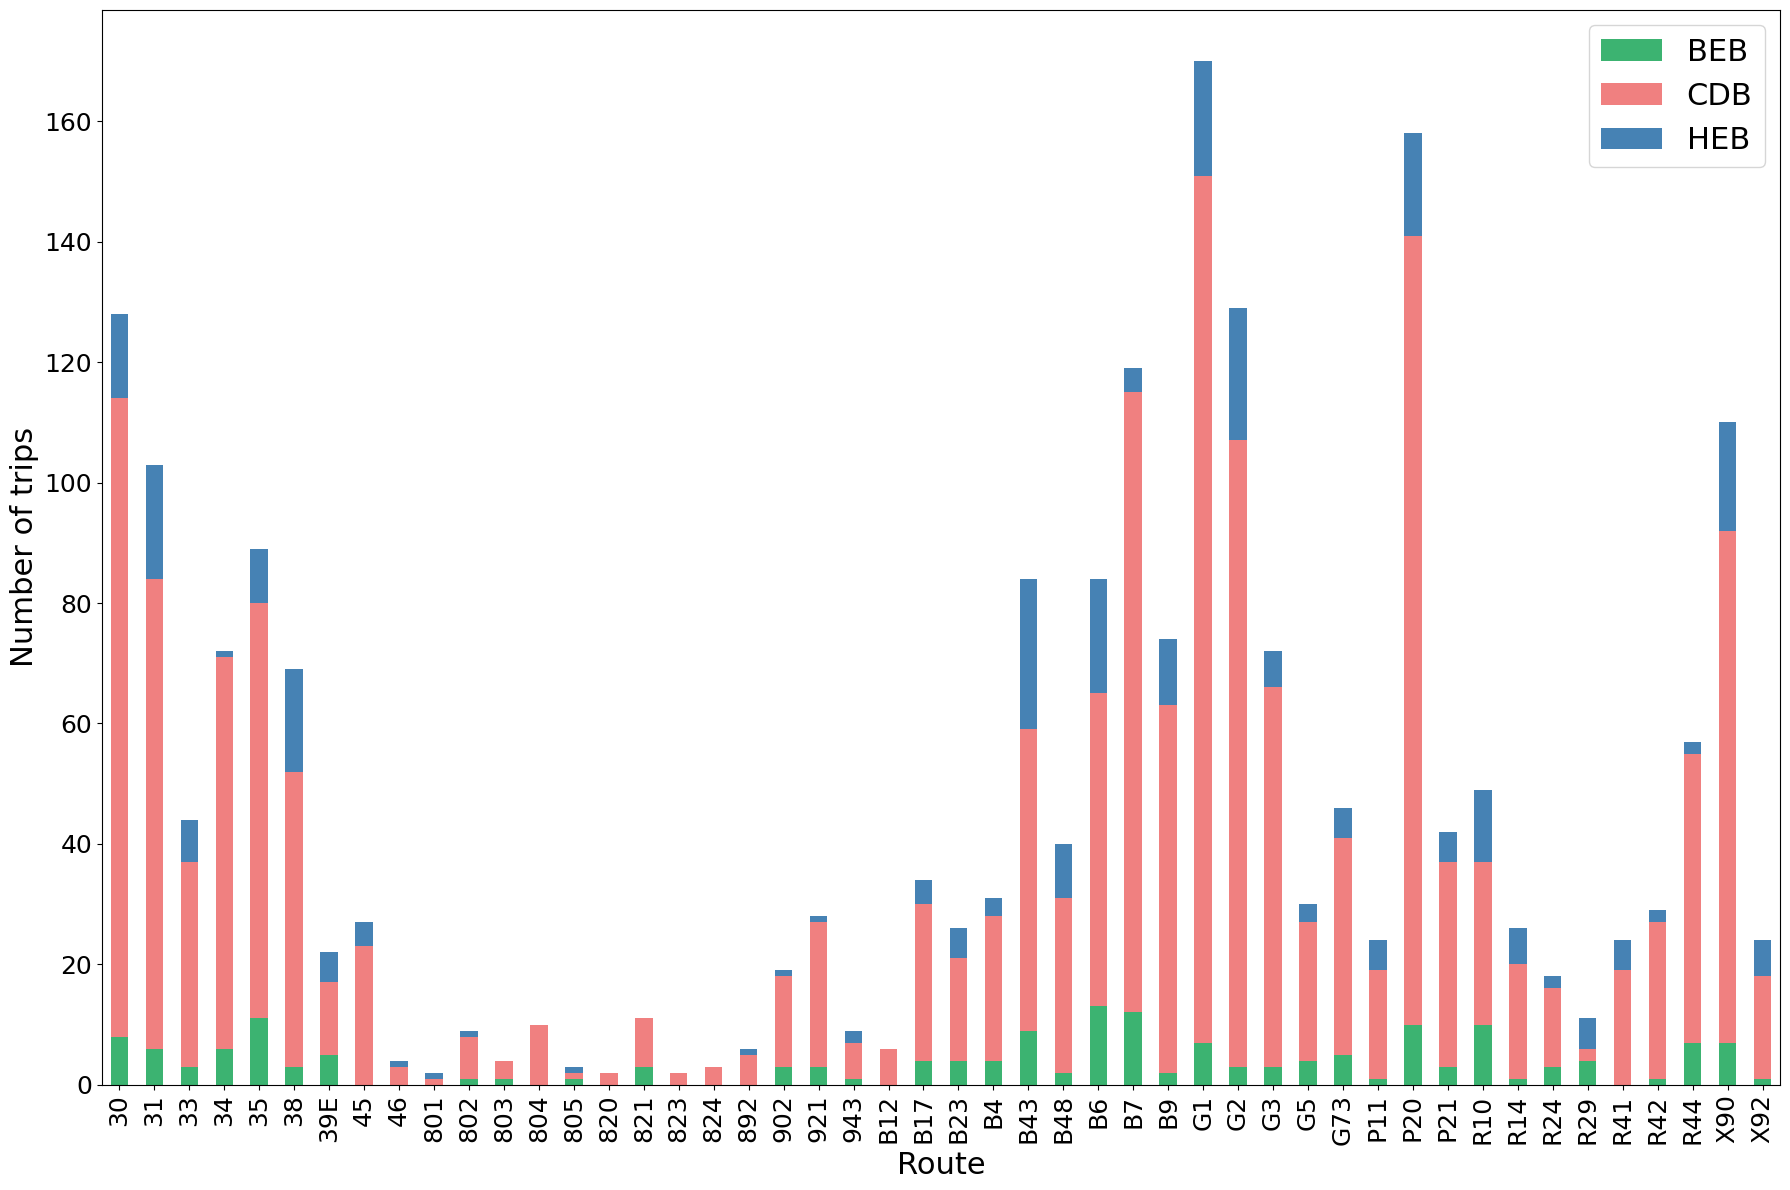

In [87]:
# Filter the dataframe for Year=13 and Value=1
m_FE_variables_filtered = m_FE_variables[(m_FE_variables['Year'] == 13) & (m_FE_variables['Value'] == 1)]
m_FE_variables_filtered = m_FE_variables_filtered[m_FE_variables_filtered['Route'] != '9999']

# Group by Route and Powertrain to count unique trips
grouped_trips = m_FE_variables_filtered.groupby(['Route', 'Powertrain'])['Trip'].nunique().unstack(fill_value=0)

# Plot
# Create a figure and a set of subplots with larger size
fig, ax = plt.subplots(figsize=(18, 12))

colors = {'CDB': 'lightcoral', 'HEB': 'steelblue', 'BEB': 'mediumseagreen'}
ax = grouped_trips.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_trips.columns], ax=ax)

# Annotate with BEB percentages
for index, (route, row) in enumerate(grouped_trips.iterrows()):
    total = row.sum()
    BEB_count = row.get('BEB', 0)
    percentage = (BEB_count / total) * 100
    #ax.text(index, row['CDB'] + row['HEB'] + (0.5 * BEB_count), f'{percentage:.1f}%', ha='center', color='white', fontsize=10)
    
# Set the title and labels with larger font sizes
ax.set_xlabel('Route', fontsize=22)
ax.set_ylabel('Number of trips', fontsize=22)
ax.legend(fontsize=22)

# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()


In [88]:
# Compute the total BEB counts and total trips
total_BEB_counts = grouped_trips['BEB'].sum()
total_trips = grouped_trips.sum(axis=1).sum()

# Calculate average %BEB across all routes
average_percentage_BEB = (total_BEB_counts / total_trips) * 100

print(f"Average %BEB across all routes: {average_percentage_BEB:.2f}%")


Average %BEB across all routes: 8.02%


In [91]:
m_FE_variables_y = pd.read_csv(r'../../results/midcap-FE-optimized-variables-y.csv', low_memory=False)

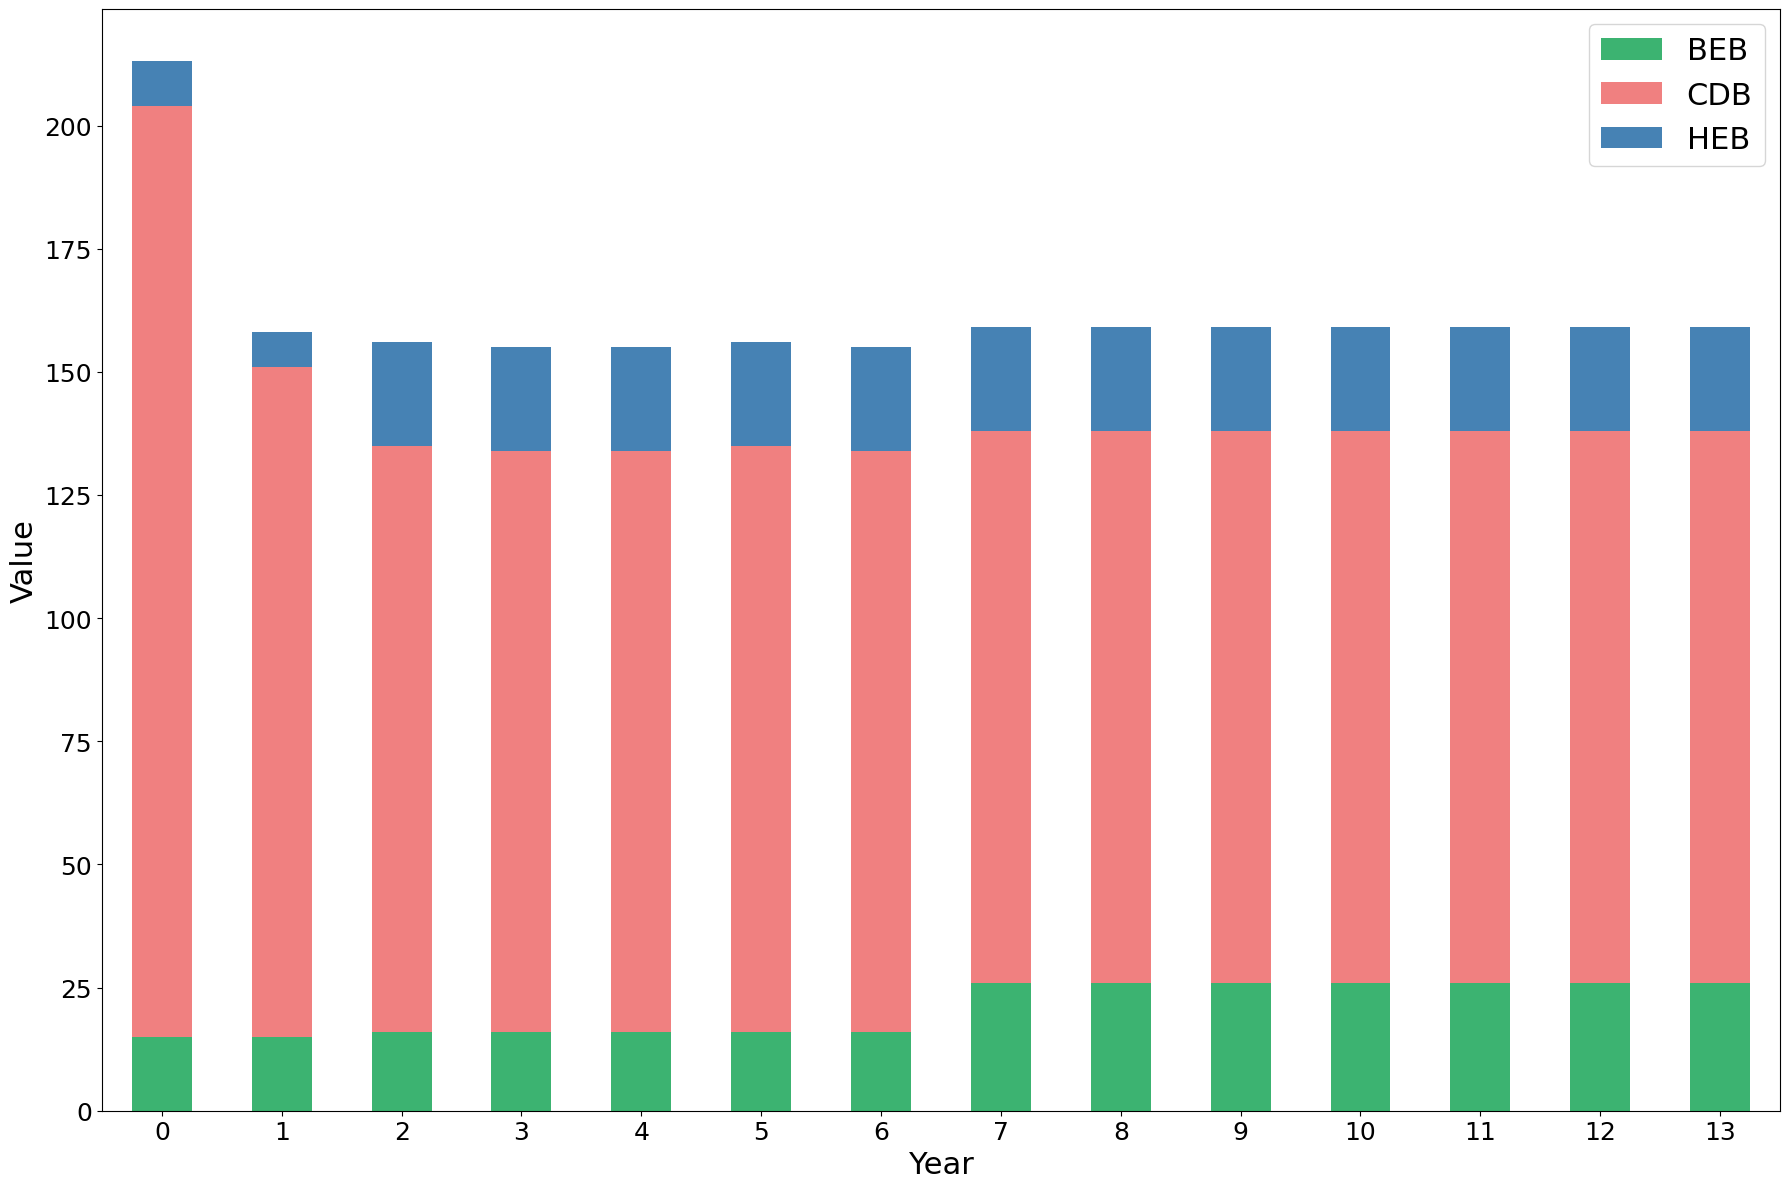

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Powertrain to sum up the Value
grouped_values = m_FE_variables_y.groupby(['Year', 'Powertrain'])['Value'].sum().unstack(fill_value=0)

# Plot
# Create a figure and a set of subplots with a larger size
fig, ax = plt.subplots(figsize=(18, 12))

colors = {'CDB': 'lightcoral', 'HEB': 'steelblue', 'BEB': 'mediumseagreen'}
ax = grouped_values.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_values.columns], ax=ax)

# Annotate with BEB percentages
for index, (year, row) in enumerate(grouped_values.iterrows()):
    total = row.sum()
    BEB_count = row.get('BEB', 0)
    percentage = (BEB_count / total) * 100
    # Uncomment the next line if you want the BEB percentages to be displayed on the bars
    # ax.text(index, row['CDB'] + row['HEB'] + (0.5 * BEB_count), f'{percentage:.1f}%', ha='center', color='white', fontsize=10)
    
# Set the title and labels with larger font sizes
ax.set_xlabel('Year', fontsize=22)
ax.set_ylabel('Value', fontsize=22)
ax.legend(fontsize=22)
ax.set_xticklabels(grouped_values.index, rotation=0)


# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()
